<a href="https://colab.research.google.com/github/RicardoBatista2020/DataScience/blob/master/StockPrice_Prediction_yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
#Get the stock quote 
start_date='2020-01-01'
end_date='2020-12-31'
company='GOOGL', 'TSLA', 'AMZN'
df = web.DataReader(company, data_source='yahoo', start=start_date, end=end_date)
#Show the data 
df

Attributes    Adj Close                           ...   Volume                   
Symbols           GOOGL        TSLA         AMZN  ...    GOOGL      TSLA     AMZN
Date                                              ...                            
2020-01-02  1368.680054  430.260010  1898.010010  ...  1363900   9532100  4029000
2020-01-03  1361.520020  443.010010  1874.969971  ...  1170400  17778500  3764400
2020-01-06  1397.810059  451.540009  1902.880005  ...  2338400  10133000  4061800
2020-01-07  1395.109985  469.059998  1906.859985  ...  1716500  17882100  4044900
2020-01-08  1405.040039  492.140015  1891.969971  ...  1765700  31144300  3508000
...                 ...         ...          ...  ...      ...       ...      ...
2020-05-20  1409.160034  815.559998  2497.939941  ...  1913100   7309300  3998100
2020-05-21  1406.750000  827.599976  2446.739990  ...  1544700  12254600  5114400
2020-05-22  1413.239990  816.880005  2436.879883  ...  1427200   9987500  2867100
2020-05-26  1421.369995  818.869995  2421.860107  ...  2227000   8075800  3562900
2020-05-27  1409.640015  806.520020  2367.209961  ...   392907   3251467  1637265

[101 rows x 18 columns]

In [12]:
df.shape

(101, 18)

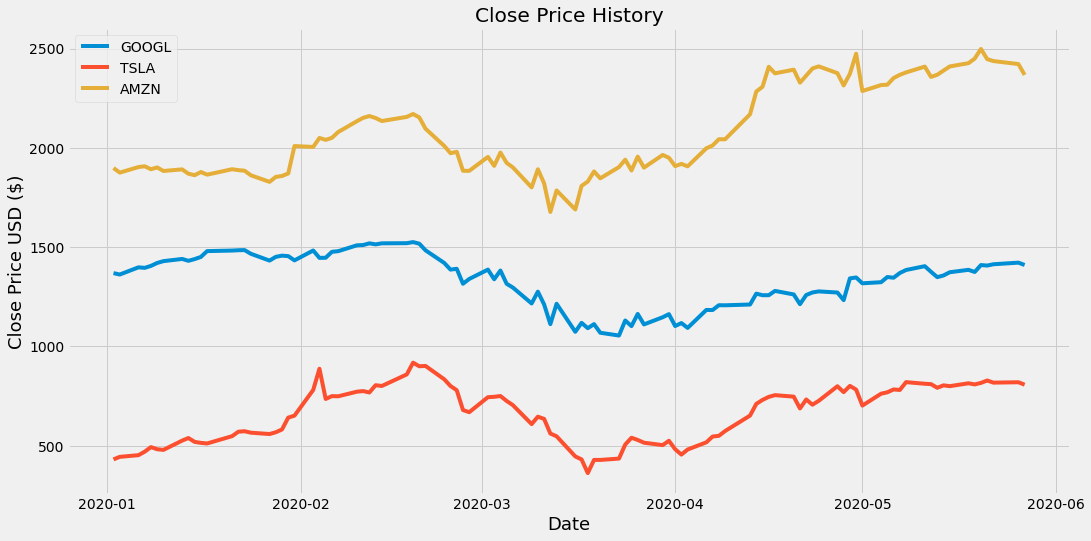

In [17]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(company)
plt.show()

In [18]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

TypeError: ignored

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
21/21 [==============================] - 2s 94ms/step - loss: 0.1113


In [0]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [63]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

55.69940058192076

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


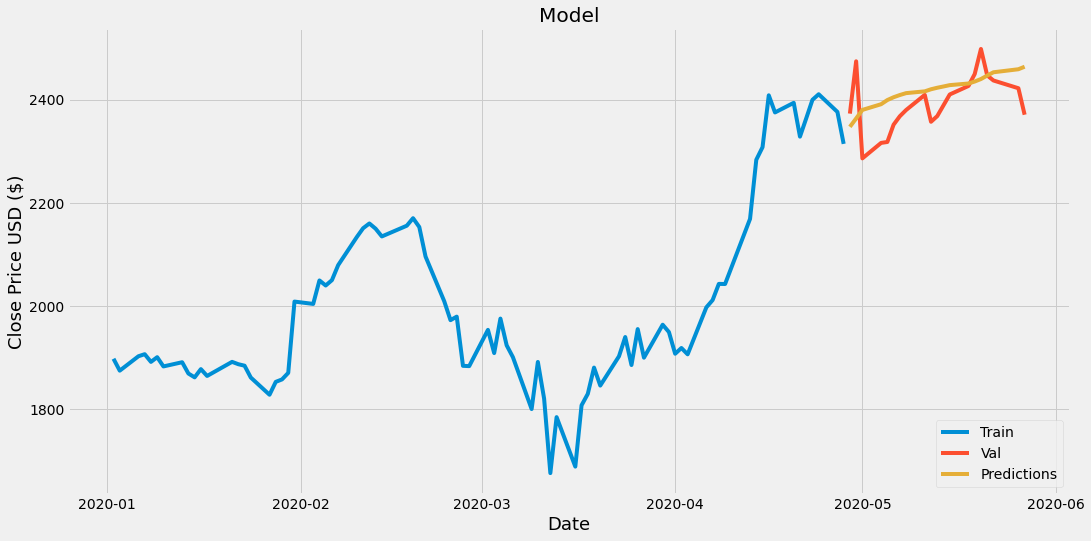

In [64]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [65]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-04-29,2372.709961,2347.145752
2020-04-30,2474.000000,2363.301758
2020-05-01,2286.040039,2379.864990
2020-05-04,2315.989990,2390.922607
2020-05-05,2317.800049,2398.972412
2020-05-06,2351.260010,2404.418945
2020-05-07,2367.610107,2408.693848
2020-05-08,2379.610107,2412.364990
2020-05-11,2409.000000,2415.834473


In [66]:
#Get the quote
apple_quote = web.DataReader(company, data_source='yahoo', start=start_date, end=end_date)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2466.1594]]


In [67]:
#Get the quote
apple_quote2 = web.DataReader(company, data_source='yahoo', start=start_date, end=end_date)
print(apple_quote2['Close'])

Date
2020-01-02    1898.010010
2020-01-03    1874.969971
2020-01-06    1902.880005
2020-01-07    1906.859985
2020-01-08    1891.969971
                 ...     
2020-05-20    2497.939941
2020-05-21    2446.739990
2020-05-22    2436.879883
2020-05-26    2421.860107
2020-05-27    2370.270020
Name: Close, Length: 101, dtype: float64
